# Flight_price project

Loading needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

CHECKING DATA ROWS AND COLUMNS

In [2]:
df=pd.read_excel('flight_train.xlsx')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [272]:
testdf=pd.read_excel('flight_test.xlsx')

In [5]:
testdf

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
testdf.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [8]:
df.shape

(10683, 11)

In [9]:
testdf.shape

(2671, 10)

train data set df contains 10683 rows and 11 columns:Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'are the different columns

test data set testdf contains 10683 rows and only 10 columns ,,here target column is missing

# df(traineddata)using for a model prediction,,&,testdf(testdata)using the model validation purpose

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [12]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

ALL THE FEATURE COLUMNS ARE IN OBJECT DTYPES, LATER WE HAVE TO ENCODE THE DATASET

In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

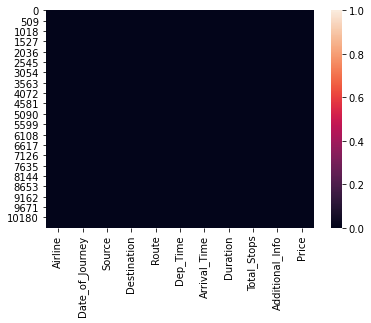

In [14]:
sns.heatmap(df.isnull())

IN TWO COLUMNS THERE IS A NULL VALUE PRESENCE WE HAVE TO TREAT IT AFTERWARDS

# EDA

# ANALYSING TARGET VARIABLE

Price column is our target here ,we want to analyse the target first

In [15]:
df['Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

TARGETCOLUMN CONSIST OF CONTINEOUS VALUES SO FOR ANALYSIS WE HAVE TO IMPLEMENT REGRESSION METHODS

# FEATURE COLUMNS:UNIVARIATE ANALYSIS

# COUNT PLOTS

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


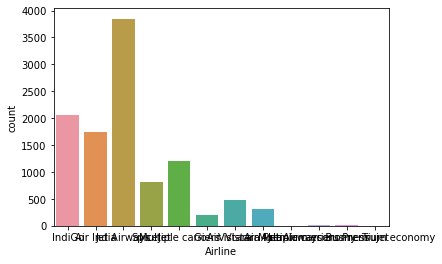

In [16]:
sns.countplot(df['Airline'])
print(df["Airline"].value_counts())

Airline COLUMN JET AIRWAYS HAVE MORE COUNT AND TRUJET HAS A SINGLE COUNT

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64


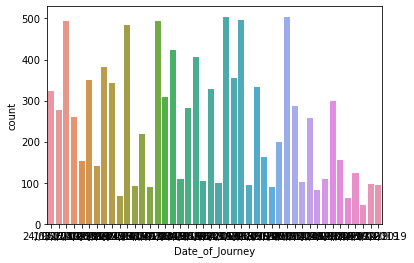

In [17]:
sns.countplot(df['Date_of_Journey'])
print(df["Date_of_Journey"].value_counts())

COLUMN PLOT GIVES THE INFORMATION ABOUT DATE OF TRAVEL

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


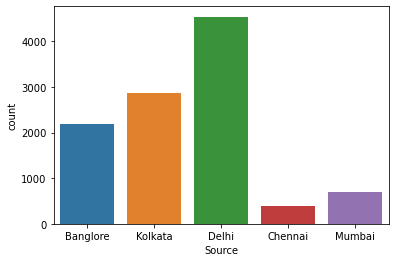

In [18]:
sns.countplot(df['Source'])
print(df["Source"].value_counts())

HELHI IS THE MAIN SOURCE AND LEAST COUNT IN CHENNAI

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


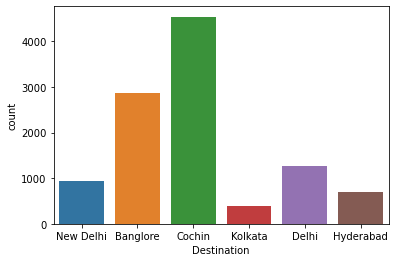

In [19]:
sns.countplot(df['Destination'])
print(df["Destination"].value_counts())

COCHIN IS THE MAIN DESTINATION OF TRAVELS AND KOLKATTA HAS LEAST COUNT

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → GOI → HYD                         1
BLR → CCU → BBI → HYD → VGA → DEL       1
CCU → IXB → DEL → BLR                   1
BLR → BOM → IXC → DEL                   1
BOM → JAI → DEL → HYD                   1
Name: Route, Length: 128, dtype: int64


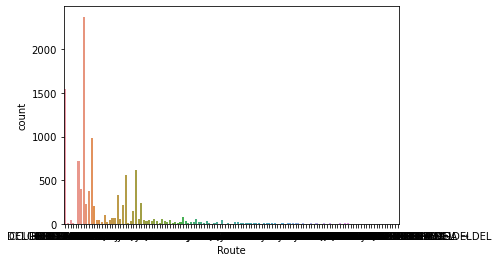

In [20]:
sns.countplot(df['Route'])
print(df["Route"].value_counts())

DEL → BOM → COK IS THE FAVOURITE ROUTE FOR TRAVELERS 

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
12:05      1
03:00      1
01:35      1
16:25      1
22:25      1
Name: Dep_Time, Length: 222, dtype: int64


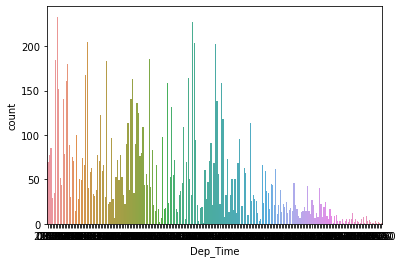

In [21]:
sns.countplot(df['Dep_Time'])
print(df["Dep_Time"].value_counts())

PLOT GIVES THE COUNT DETAILS OF TIMING OF EACH JOURNEY

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
20:25 02 Apr      1
11:05 25 Mar      1
14:35 10 Jun      1
01:00 25 Apr      1
00:10 25 Apr      1
Name: Arrival_Time, Length: 1343, dtype: int64


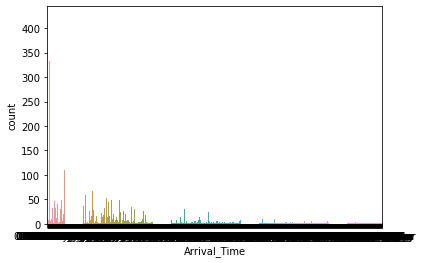

In [22]:
sns.countplot(df['Arrival_Time'])
print(df["Arrival_Time"].value_counts())

Arrival_Time DETAILS ARE CONVEYING THE ABOVE PLOT

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
30h 25m      1
19h 50m      1
28h 30m      1
29h 30m      1
35h 20m      1
Name: Duration, Length: 368, dtype: int64


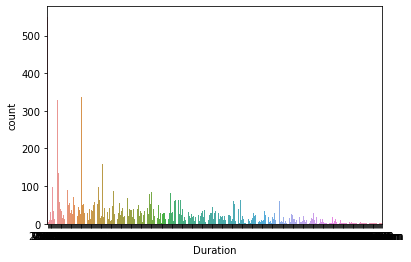

In [23]:
sns.countplot(df['Duration'])
print(df["Duration"].value_counts())

Duration OF EACH JOURNEY IS EXPLAINING BY DURATION COLUMN PLOT

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


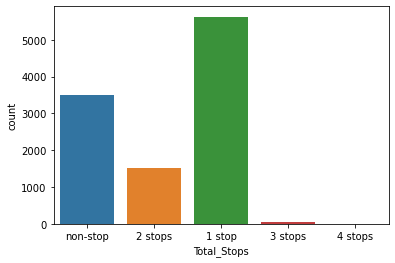

In [24]:
sns.countplot(df['Total_Stops'])
print(df["Total_Stops"].value_counts())

SINGLE STOP IS MOSTLY PREFERED BY PASSENGERS

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64


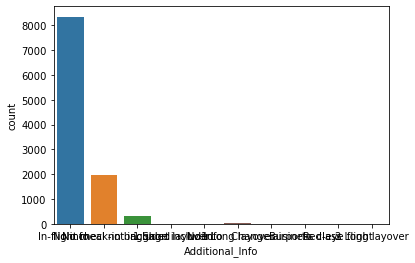

In [25]:
sns.countplot(df['Additional_Info'])
print(df["Additional_Info"].value_counts())

FIGURE SHOWS THE ADDITIONAL INFORMATION ABOUT THE TRAVEL

# bivariate analysis

<AxesSubplot:title={'center':'comparison of Airline AND Price'}, xlabel='Airline', ylabel='Price'>

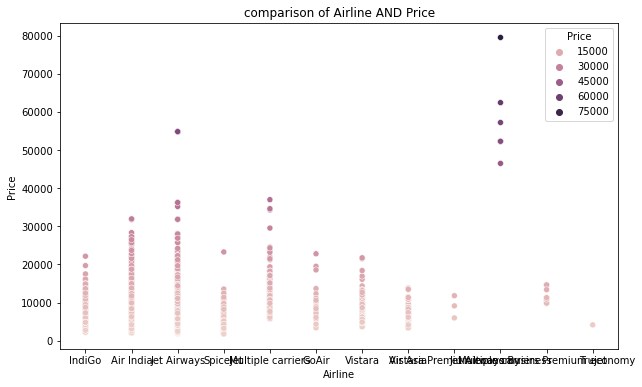

In [26]:
plt.figure(figsize=[10,6])
plt.title('comparison of Airline AND Price')
sns.scatterplot(df['Airline'],df['Price'],hue=df['Price'])

airlines are surely depending price of travel jet airways business always have high price value

<AxesSubplot:title={'center':'comparison ofDestination  ANDPrice '}, xlabel='Destination', ylabel='Price'>

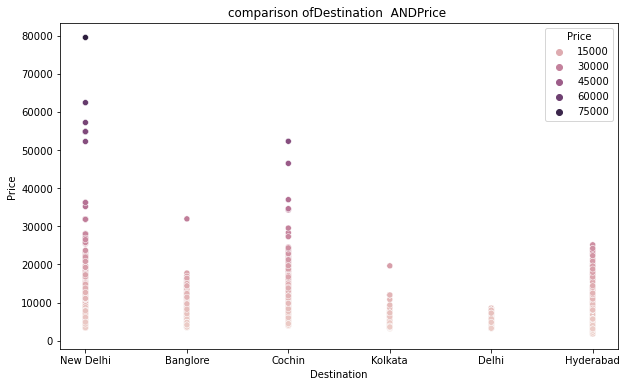

In [27]:
plt.figure(figsize=[10,6])
plt.title('comparison ofDestination  ANDPrice ')
sns.scatterplot(df['Destination'],df['Price'],hue=df['Price'])

destination also depending price values newdelhi and cochin have high rates

<AxesSubplot:title={'center':'comparison of Dep_Time AND Price'}, xlabel='Dep_Time', ylabel='Price'>

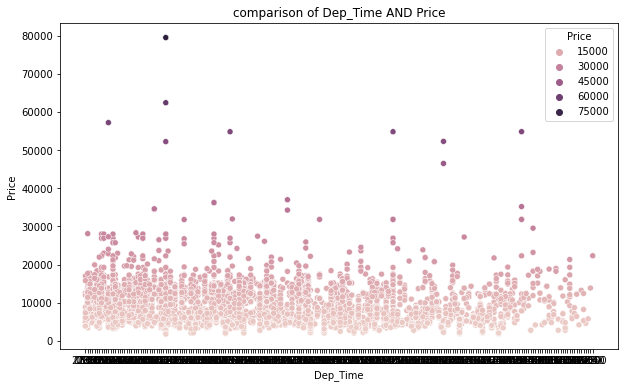

In [28]:
plt.figure(figsize=[10,6])
plt.title('comparison of Dep_Time AND Price')
sns.scatterplot(df['Dep_Time'],df['Price'],hue=df['Price'])

detarture time is not at all depending price

<AxesSubplot:title={'center':'comparison of Duration AND Price'}, xlabel='Duration', ylabel='Price'>

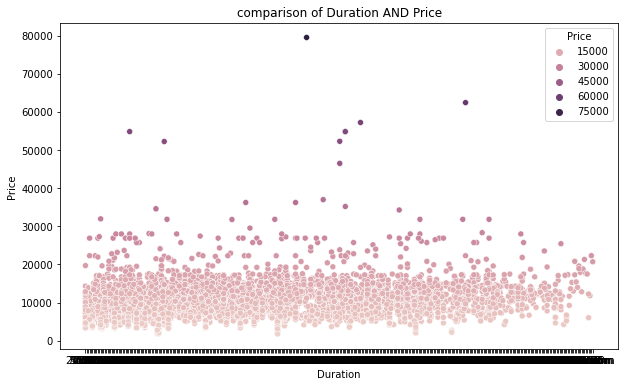

In [29]:
plt.figure(figsize=[10,6])
plt.title('comparison of Duration AND Price')
sns.scatterplot(df['Duration'],df['Price'],hue=df['Price'])

duration also not depending the price of the flight

<AxesSubplot:title={'center':'comparison of Total_Stops AND Price'}, xlabel='Total_Stops', ylabel='Price'>

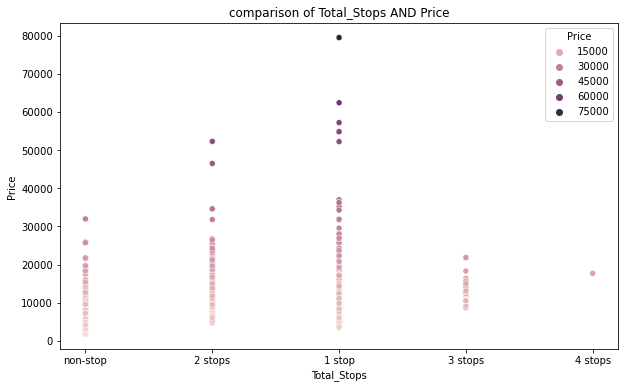

In [30]:
plt.figure(figsize=[10,6])
plt.title('comparison of Total_Stops AND Price')
sns.scatterplot(df['Total_Stops'],df['Price'],hue=df['Price'])

single stop is always have high fare, fasre is surely depending stops

#  CHECKING OUTLIERS

OUTLIER PRESENCE IS NOT THERE

# DATA PREPROCESSING

In [31]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

ALL COLUMNS ARE CATEGORICAL AND IN OBJECT DTYPES,,SO WE WANT TO ENCODE IT

# treating null variable

In [32]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

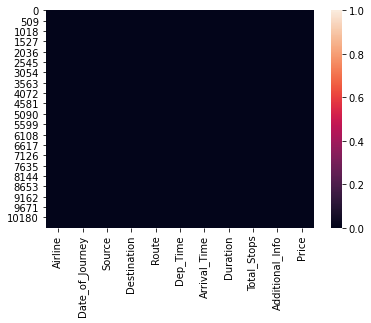

In [33]:
sns.heatmap(df.isnull())

Route AND Total_Stops  CONTAINS NULL VALUES, WE WANT TO TREAT IT WITH MODE

In [34]:
df['Route']=df['Route'].fillna(df['Route'].mode()[0])

In [35]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

<AxesSubplot:>

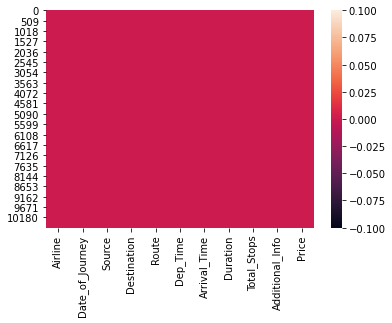

In [36]:
sns.heatmap(df.isnull())

NULL VALUES CLEARTED

# ENCODING

In [37]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [38]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [39]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,4.0,8.0,3897
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0,7662
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0,13882
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0,6218
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,41.0,3.0,0.0,64.0,183.0,1259.0,236.0,4.0,8.0,4107
10679,1.0,29.0,3.0,0.0,64.0,193.0,1305.0,237.0,4.0,8.0,4145
10680,4.0,29.0,0.0,2.0,18.0,58.0,824.0,280.0,4.0,8.0,7229
10681,10.0,0.0,0.0,5.0,18.0,92.0,938.0,238.0,4.0,8.0,12648


In [40]:
df.dtypes

Airline            float64
Date_of_Journey    float64
Source             float64
Destination        float64
Route              float64
Dep_Time           float64
Arrival_Time       float64
Duration           float64
Total_Stops        float64
Additional_Info    float64
Price                int64
dtype: object

datas encoded sussessfully

# CORRELATION AND HEATMAP

In [41]:
cor=df.corr()

In [42]:
cor

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.022251,-0.013401,0.018479,0.025118,-0.039439,-0.015733,0.027917,0.036064,-0.060802,-0.039520
Date_of_Journey,0.022251,1.000000,0.167549,-0.273357,0.275181,-0.007836,-0.012507,-0.001168,-0.044152,0.008382,-0.036942
Source,-0.013401,0.167549,1.000000,-0.592574,0.403403,0.055191,0.020844,-0.192009,-0.225601,-0.022107,0.015998
Destination,0.018479,-0.273357,-0.592574,1.000000,-0.461183,-0.063608,-0.036830,0.022037,0.337883,0.026806,-0.071112
Route,0.025118,0.275181,0.403403,-0.461183,1.000000,-0.082051,0.010560,-0.062097,-0.437783,0.035188,0.164118
Dep_Time,-0.039439,-0.007836,0.055191,-0.063608,-0.082051,1.000000,-0.023294,0.041619,0.044687,-0.052853,0.002949
Arrival_Time,-0.015733,-0.012507,0.020844,-0.036830,0.010560,-0.023294,1.000000,0.027746,-0.097132,0.017505,0.027377
Duration,0.027917,-0.001168,-0.192009,0.022037,-0.062097,0.041619,0.027746,1.000000,0.175207,0.080151,-0.144270
Total_Stops,0.036064,-0.044152,-0.225601,0.337883,-0.437783,0.044687,-0.097132,0.175207,1.000000,0.164009,-0.571174
Additional_Info,-0.060802,0.008382,-0.022107,0.026806,0.035188,-0.052853,0.017505,0.080151,0.164009,1.000000,-0.065478


ABOVE TABLE GIVES THE DETAILS OF CORRELATION AMONG COLUMNS, PLOT WILL CONVEY THIS MORE

<AxesSubplot:>

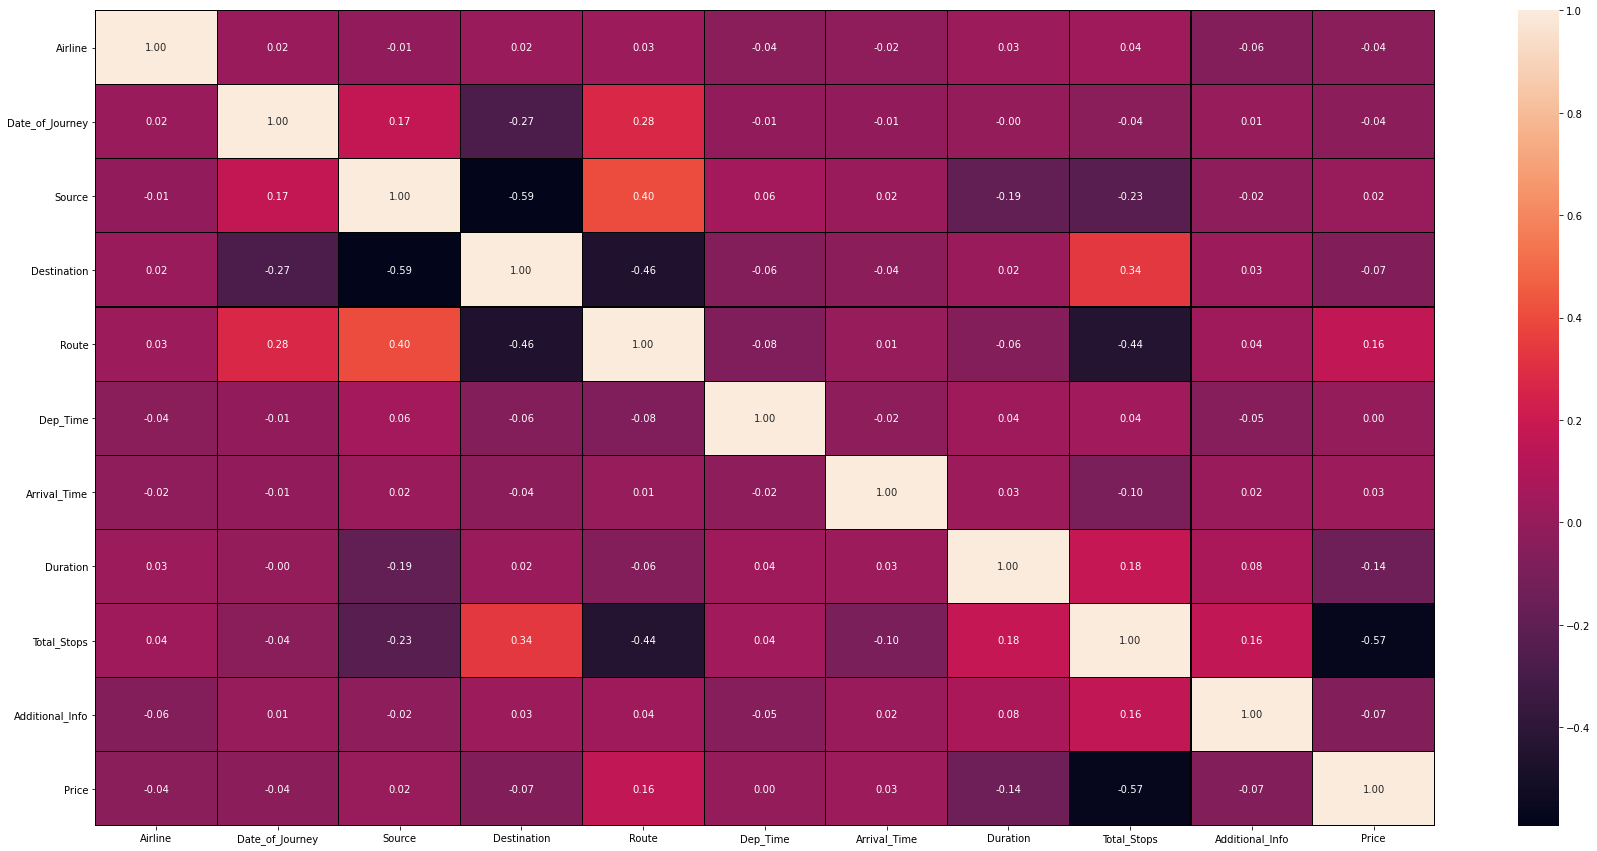

In [43]:
plt.figure(figsize=(30,15))
sns.heatmap(cor,annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

TO KNOW THE DEPENDENCY TO TARGET WE HAVE TO DEPEND ANOTHER PLOT

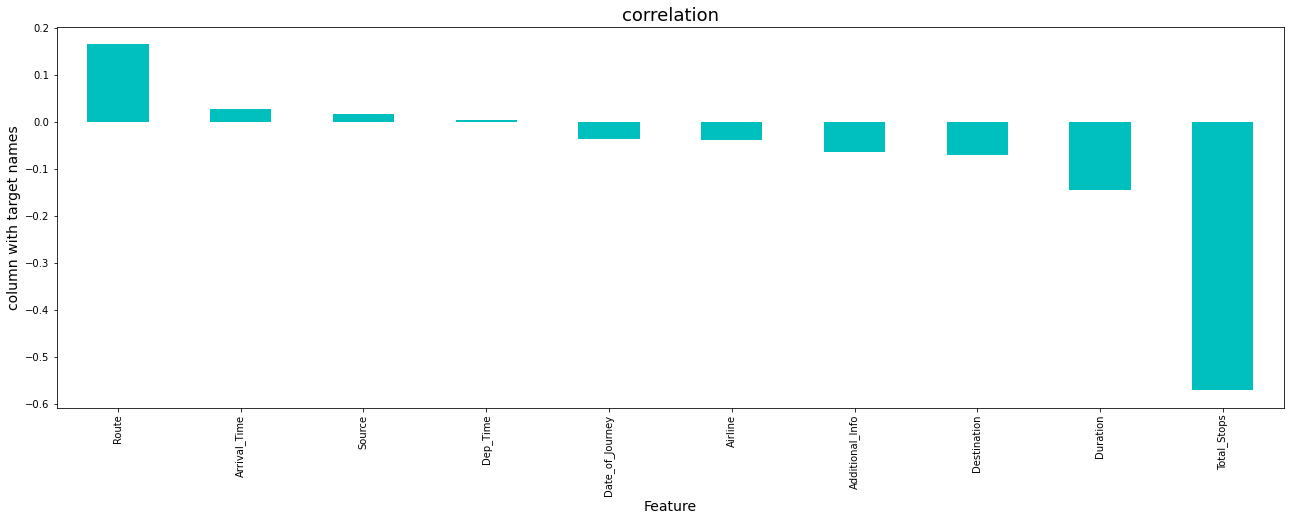

In [44]:
plt.figure(figsize=(22,7))
cor['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

WE HAVE TO DROP SOME UNWANTED COLUMNS WHICH HAVE LESS DEPENDENCY

In [45]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)
df.drop(['Total_Stops'],axis=1,inplace=True)

# SKEWNESS REMOVAL

In [46]:
df.skew()

Airline            0.731095
Source            -0.424054
Destination        1.244169
Route             -0.502066
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Additional_Info   -1.779838
Price              1.812552
dtype: float64

SOME CCOLUMNS HAVE SKEWNESS PRESENCE ,HISTOGRAM CLEARLEY CONVEYS THIS

<AxesSubplot:ylabel='Frequency'>

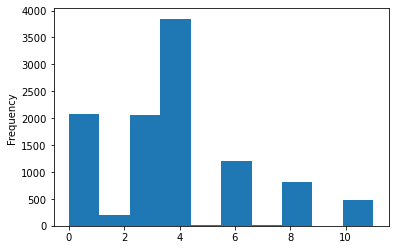

In [47]:
df['Airline'].plot.hist()

Airline SHOWS SKEWNESS PRESENCE

<AxesSubplot:ylabel='Frequency'>

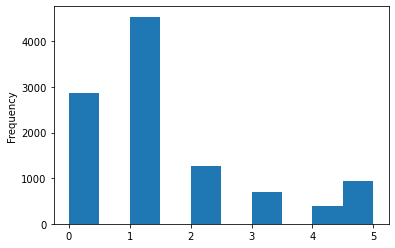

In [48]:
df['Destination'].plot.hist()

Destination has clear skewness presence in the plot

<AxesSubplot:ylabel='Frequency'>

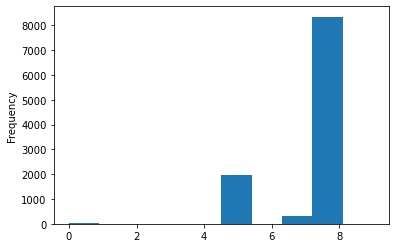

In [49]:
df['Additional_Info'].plot.hist()

Additional_Info has skewness presence

# REMOVING SKEWNESS BY SQRT

In [50]:
from scipy import sqrt

In [51]:
df["Airline"]=np.sqrt(df["Airline"])
df["Destination"]=np.sqrt(df["Destination"])
df["Additional_Info"]=np.sqrt(df["Additional_Info"])

In [52]:
df.skew()

Airline           -0.473393
Source            -0.424054
Destination        0.022293
Route             -0.502066
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Additional_Info   -3.143740
Price              1.812552
dtype: float64

splitting X AND Y AND APPLYING POWER TRANSFORM

In [54]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [55]:
x.shape

(10683, 8)

In [56]:
y.shape

(10683,)

In [58]:
from sklearn.preprocessing import PowerTransformer

In [59]:
pt=PowerTransformer(method="yeo-johnson")

In [60]:
X_power=pt.fit_transform(x)

In [61]:
df1=pd.DataFrame(X_power,columns=x.columns)

In [62]:
df1.skew()

Airline            0.004986
Source            -0.238259
Destination       -0.108238
Route             -0.442983
Dep_Time          -0.150760
Arrival_Time      -0.381592
Duration          -0.390688
Additional_Info   -1.376375
dtype: float64

In [63]:
df1.drop(['Additional_Info'],axis=1,inplace=True)

skewness is handled successfully

# MULTICOLLINEARITY

VIF HELP TO FIND THE MULTICOLLINEARITY

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [66]:
vif_calc()

   VIF Factor         Features
0    8.516468          Airline
1    6.854880           Source
2    4.697353      Destination
3    6.237938            Route
4    4.049098         Dep_Time
5    7.555040     Arrival_Time
6    4.426092         Duration
7   30.990676  Additional_Info


NO VIF VALUES ARE IN HIGH RANGE

# SCALING FEATURES

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc=StandardScaler()

In [69]:
x=sc.fit_transform(x)

In [70]:
x

array([[-0.22875125, -1.65844074,  1.80243833, ..., -1.92108588,
         0.42287466,  0.47054034],
       [-1.35000195,  0.89005213, -1.3848823 , ...,  0.10911685,
         1.30672664,  0.47054034],
       [ 0.18165498,  0.04055451,  0.04053082, ..., -1.37808961,
        -0.81083539,  0.47054034],
       ...,
       [ 0.18165498, -1.65844074,  0.63095626, ..., -0.13824812,
         0.79114632,  0.47054034],
       [ 1.96186562, -1.65844074,  1.80243833, ...,  0.20564952,
         0.40446108,  0.47054034],
       [-1.35000195,  0.04055451,  0.04053082, ...,  0.76674567,
         1.40800134,  0.47054034]])

# SPLITTING AND APPLYING ALGORITHMS

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [73]:
x_train.shape

(7478, 8)

In [74]:
x_test.shape

(3205, 8)

In [75]:
y_train.shape

(7478,)

In [76]:
y_test.shape

(3205,)

# LINEAR REGRESSION

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [121]:
lm=LinearRegression()

In [122]:
lm.fit(x_train,y_train)

LinearRegression()

In [123]:
pred=lm.predict(x_test)

In [124]:
print(pred)

[ 8671.99632584 10296.2368576  10065.52781452 ...  6509.17198859
 12731.96751724  8674.59007781]


# ERROR CALCULATIONS

In [125]:
print("mean absolute error:",mean_absolute_error(y_test,pred))

mean absolute error: 3341.365806785645


In [126]:
print("mean squred error:",mean_squared_error(y_test,pred))

mean squred error: 19922276.787763305


In [127]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

root mean squared error: 4463.437776844582


# r2 score

In [128]:
from sklearn.metrics import r2_score

In [129]:
lmscore=r2_score(y_test,pred)

In [130]:
print(lmscore)

0.05613002250009669


# SUPPORT VECTOR REGRESSOR

In [131]:
from sklearn.svm import SVR

In [132]:
svr=SVR(kernel="linear")

In [133]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [134]:
svrpred=svr.predict(x_test)

In [135]:
print(svrpred)

[ 8124.82578449  8823.86755274  8965.50994849 ...  7355.3478762
 11937.54014163  8073.12506996]


# ERRORS

In [136]:
print("mean absolute error:",mean_absolute_error(y_test,svrpred))

mean absolute error: 3270.9766327914044


In [137]:
print("mean squred error:",mean_squared_error(y_test,svrpred))

mean squred error: 20676888.280883823


In [138]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,svrpred)))

root mean squared error: 4547.184654364041


# R2 SCORE

In [139]:
svrscore=r2_score(y_test,svrpred)

In [140]:
print(svrscore)

0.020378329025467545


# DECISION TREE REGRESSOR

In [99]:
from sklearn.tree import DecisionTreeRegressor

In [100]:
dtr=DecisionTreeRegressor()

In [101]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [102]:
dtrpred=dtr.predict(x_test)

In [103]:
print(dtrpred)

[ 7223.33333333 15078.         16142.         ... 11148.
 25735.         15484.75      ]


# ERRORS

In [104]:
print("mean absolute error:",mean_absolute_error(y_test,dtrpred))

mean absolute error: 1258.9394214986514


In [105]:
print("mean squred error:",mean_squared_error(y_test,dtrpred))

mean squred error: 7989044.257931071


In [106]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,dtrpred)))

root mean squared error: 2826.4897413454505


# R2 SCORE

In [107]:
dtrscore=r2_score(y_test,dtrpred)

In [108]:
print(dtrscore)

0.6214981297413384


# K-neighbor regressor

In [109]:
from sklearn.neighbors import KNeighborsRegressor

In [110]:
knnr=KNeighborsRegressor()

In [111]:
knnr.fit(x_train,y_train)

KNeighborsRegressor()

In [112]:
knnrpred=knnr.predict(x_test)

In [113]:
print(knnrpred)

[ 7153.   8603.4  7322.2 ... 12332.  28696.  15417.2]


# ERRORS

In [114]:
print("mean absolute error:",mean_absolute_error(y_test,knnrpred))

mean absolute error: 1384.3398439937598


In [115]:
print("mean squred error:",mean_squared_error(y_test,knnrpred))

mean squred error: 6593640.248811233


In [116]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,knnrpred)))

root mean squared error: 2567.808452515731


# R2 SCORE

In [117]:
knnrscore=r2_score(y_test,knnrpred)

In [118]:
print(knnrscore)

0.6876090449104417


WE WANT TO FIND THE CROSS VALIDATION SCORE TO FIND THE BEST ALGORITHM

# CROSS VALIDATION MEAN SCORE

In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
print(cross_val_score(lm,x,y,cv=5).mean())

0.06714058368081303


In [143]:
print(cross_val_score(svr,x,y,cv=5).mean())

0.020856750553383874


In [144]:
print(cross_val_score(dtr,x,y,cv=5).mean())

0.6902409447959534


In [145]:
print(cross_val_score(knnr,x,y,cv=5).mean())

0.7081935051824186


HERE SELECTING KNN FOR FURTHER PROCEEDINGS

# HYPER PARAMETER TUNING FOR KNN

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
parameter={'n_neighbors':np.arange(2,10),
          'weights':['uniform','distance'],
          'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[5,10,15]}

In [148]:
GCV=GridSearchCV(KNeighborsRegressor(),parameter,cv=5)

In [149]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 15],
                         'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [150]:
GCV.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 15,
 'n_neighbors': 9,
 'weights': 'distance'}

PASSING THIS BEST PARAMETER VALUES TO MODEL

In [151]:
Flight_model=KNeighborsRegressor(algorithm ='ball_tree', n_neighbors = 9, weights = 'distance',leaf_size = 15)

In [152]:
Flight_model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=15, n_neighbors=9,
                    weights='distance')

In [153]:
Finalpred=Flight_model.predict(x_test)

In [154]:
Finalr2score=r2_score(y_test,Finalpred)

In [155]:
print(Finalr2score)

0.6542571926399556


# saving and conclusion of model

In [156]:
Finalconclusion=pd.DataFrame([Flight_model.predict(x_test)[:],Finalpred[:]],index=["Predicted","Orginal"])

In [157]:
Finalconclusion

,0,1,2,3,4,5,6,7,8,9,...,3195,3196,3197,3198,3199,3200,3201,3202,3203,3204
Predicted,7223.333333,8917.62365,7618.928597,4577.563915,4261.666667,14368.437762,7579.0,13371.166667,15129.0,4279.444444,...,7094.430547,5336.25,11982.0,3948.333333,3729.5,4823.0,9781.634433,8982.556065,27629.142026,15484.75
Orginal,7223.333333,8917.62365,7618.928597,4577.563915,4261.666667,14368.437762,7579.0,13371.166667,15129.0,4279.444444,...,7094.430547,5336.25,11982.0,3948.333333,3729.5,4823.0,9781.634433,8982.556065,27629.142026,15484.75


# SAVING

In [158]:
import joblib

In [159]:
joblib.dump(Flight_model,"Flight_model.obj")

['Flight_model.obj']

# TEST DATA FOR VALIDATION

# PREPROSESSING FOR TEST DATA

In [273]:
testdf

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [274]:
testdf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [275]:
testdf.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [276]:
testdf.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

<AxesSubplot:>

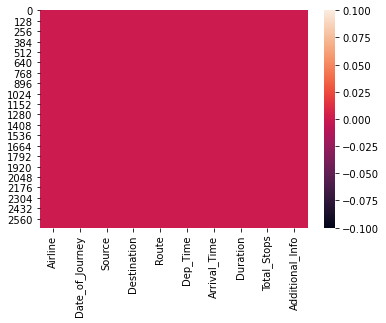

In [277]:
sns.heatmap(testdf.isnull())

no null values in data, but dtype is object

# PREPROSESSING OF TEST DATA

# ENCODING

In [278]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [279]:
for i in testdf.columns:
    if testdf[i].dtypes=="object":
        testdf[i]=enc.fit_transform(testdf[i].values.reshape(-1,1))

In [280]:
testdf

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4.0,39.0,2.0,1.0,76.0,138.0,150.0,10.0,0.0,5.0
1,3.0,10.0,3.0,0.0,65.0,31.0,353.0,248.0,0.0,5.0
2,4.0,22.0,2.0,1.0,76.0,156.0,566.0,148.0,0.0,3.0
3,6.0,22.0,2.0,1.0,76.0,48.0,633.0,36.0,0.0,5.0
4,0.0,27.0,0.0,2.0,16.0,198.0,135.0,216.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...
2666,1.0,39.0,3.0,0.0,51.0,170.0,617.0,150.0,0.0,5.0
2667,3.0,28.0,3.0,0.0,43.0,106.0,507.0,213.0,4.0,5.0
2668,4.0,36.0,2.0,1.0,76.0,183.0,151.0,278.0,0.0,5.0
2669,1.0,36.0,2.0,1.0,76.0,11.0,577.0,60.0,0.0,5.0


In [281]:
testdf.dtypes

Airline            float64
Date_of_Journey    float64
Source             float64
Destination        float64
Route              float64
Dep_Time           float64
Arrival_Time       float64
Duration           float64
Total_Stops        float64
Additional_Info    float64
dtype: object

# CORRELATION AND HEATMAP

In [282]:
corr=testdf.corr()

In [283]:
corr

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
Airline,1.000000,0.018772,-0.031107,0.033630,0.023995,-0.000056,-0.019198,0.027559,0.039236,-0.084423
Date_of_Journey,0.018772,1.000000,0.146850,-0.260489,0.247562,-0.023362,-0.009460,-0.013174,-0.042129,0.034785
Source,-0.031107,0.146850,1.000000,-0.578296,0.339434,0.048534,-0.002197,-0.169256,-0.212995,-0.025205
Destination,0.033630,-0.260489,-0.578296,1.000000,-0.444760,-0.035993,-0.004226,-0.007661,0.331240,0.026295
Route,0.023995,0.247562,0.339434,-0.444760,1.000000,-0.146110,-0.004257,-0.053478,-0.441772,0.059682
Dep_Time,-0.000056,-0.023362,0.048534,-0.035993,-0.146110,1.000000,-0.007133,0.073045,0.080940,-0.070610
Arrival_Time,-0.019198,-0.009460,-0.002197,-0.004226,-0.004257,-0.007133,1.000000,0.048875,-0.094387,0.016033
Duration,0.027559,-0.013174,-0.169256,-0.007661,-0.053478,0.073045,0.048875,1.000000,0.197855,0.051093
Total_Stops,0.039236,-0.042129,-0.212995,0.331240,-0.441772,0.080940,-0.094387,0.197855,1.000000,0.136402
Additional_Info,-0.084423,0.034785,-0.025205,0.026295,0.059682,-0.070610,0.016033,0.051093,0.136402,1.000000


<AxesSubplot:>

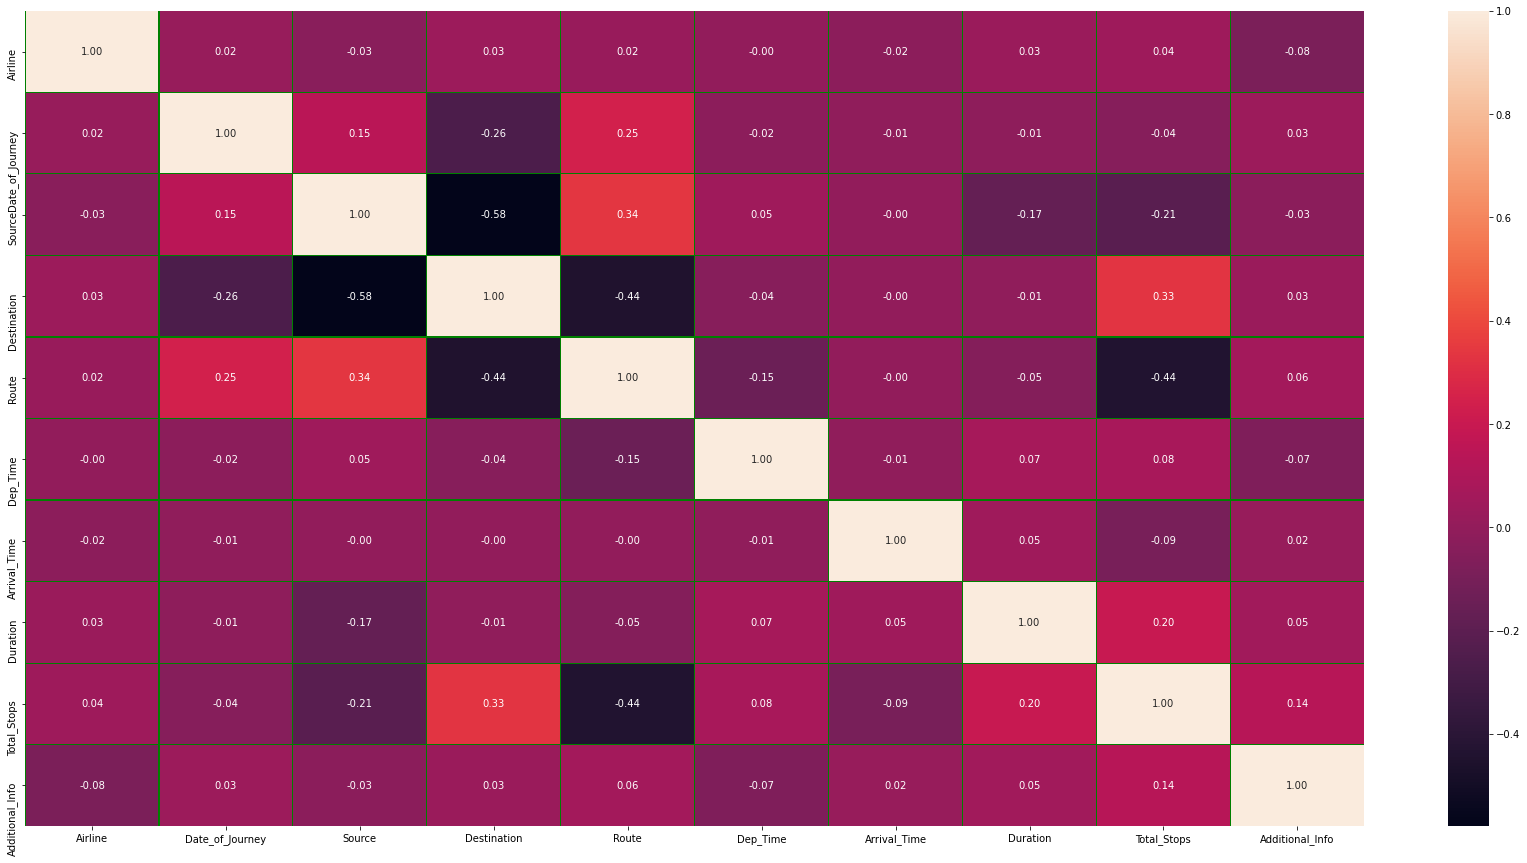

In [284]:
plt.figure(figsize=(30,15))
sns.heatmap(corr,annot=True,linewidths=0.1,linecolor="green",fmt="0.2f")

In [285]:
testdf.drop(['Date_of_Journey'],axis=1,inplace=True)
testdf.drop(['Total_Stops'],axis=1,inplace=True)

# SKEWNESS REMOVAL

In [286]:
testdf.skew()

Airline            0.483882
Source            -0.424997
Destination        1.263630
Route             -0.281807
Dep_Time           0.178928
Arrival_Time      -0.523661
Duration          -0.275404
Additional_Info   -1.719119
dtype: float64

In [287]:
from scipy import sqrt

In [288]:
testdf["Airline"]=np.sqrt(testdf["Airline"])
testdf["Destination"]=np.sqrt(testdf["Destination"])
testdf["Additional_Info"]=np.sqrt(testdf["Additional_Info"])

In [289]:
testdf.skew()

Airline           -0.608460
Source            -0.424997
Destination        0.018939
Route             -0.281807
Dep_Time           0.178928
Arrival_Time      -0.523661
Duration          -0.275404
Additional_Info   -2.087327
dtype: float64

In [290]:
x1=testdf

In [291]:
testdf

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info
0,2.000000,2.0,1.000000,76.0,138.0,150.0,10.0,2.236068
1,1.732051,3.0,0.000000,65.0,31.0,353.0,248.0,2.236068
2,2.000000,2.0,1.000000,76.0,156.0,566.0,148.0,1.732051
3,2.449490,2.0,1.000000,76.0,48.0,633.0,36.0,2.236068
4,0.000000,0.0,1.414214,16.0,198.0,135.0,216.0,2.236068
...,...,...,...,...,...,...,...,...
2666,1.000000,3.0,0.000000,51.0,170.0,617.0,150.0,2.236068
2667,1.732051,3.0,0.000000,43.0,106.0,507.0,213.0,2.236068
2668,2.000000,2.0,1.000000,76.0,183.0,151.0,278.0,2.236068
2669,1.000000,2.0,1.000000,76.0,11.0,577.0,60.0,2.236068


# using loaded model for prediction

In [292]:
Flight_model_from_joblib=joblib.load("Flight_model.obj")

In [293]:
testpred=Flight_model_from_joblib.predict(testdf)

In [294]:
print(testpred)

[ 4695.11111111 10711.34617768  4565.8564521  ...  6379.33860156
  5691.77919029  4565.88700686]


# save the prediction as CSV

In [295]:
Flightprediction=pd.DataFrame(testpred,columns=["testpred"]).to_csv("flighttestpred.csv")